In [1]:
import dask
from time import sleep, time
import numpy as np
from matplotlib import pyplot as plt

import multiprocessing
# Get the number of CPU cores
num_cores = multiprocessing.cpu_count()

print("Number of available CPU cores according to multiprocessing:", num_cores)

Number of available CPU cores according to multiprocessing: 24


Dask seems to understand how many CPUs are actually avalable, while multiprocessing just reports the whole node
## Dask

Text(0, 0.5, 'Time')

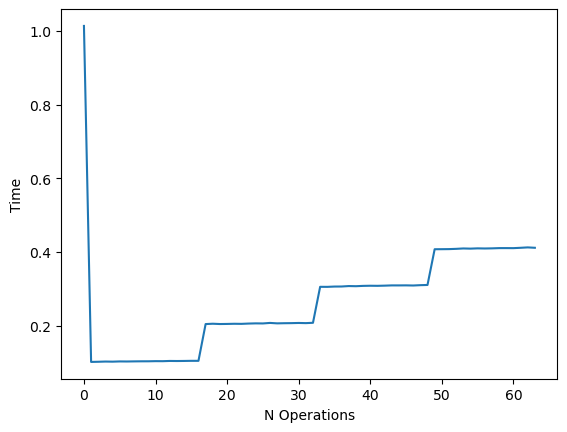

In [2]:
@dask.delayed
def inc(x):
    sleep(.1)
    return x + 1

@dask.delayed
def add(nums):
    # sleep(1)
    return sum(nums)

operations = np.arange(64)
times = []
for j in operations:
    nums = []
    for i in range(j):
        nums.append(inc(i))
    z = add(nums)
    start = time()
    z.compute()
    end = time()
    times.append(end - start)
plt.plot(operations, times)
plt.xlabel("N Operations")
plt.ylabel("Time")

## Serial

In [3]:
def inc(x):
    sleep(.1)
    return x + 1


def add(nums):
    # sleep(1)
    return sum(nums)

nums = []
for i in range(8):
    nums.append(inc(i))
z = add(nums)
z

36

It seems that dask delayed is getting hung up: https://stackoverflow.com/questions/51908579/dask-delayed-results-in-no-speedup

# Dask Distributed

In [4]:
from dask.distributed import Client
client = Client()
client

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44681 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:44681/status,
Dashboard: http://127.0.0.1:44681/status,Workers: 4
Total threads: 16,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37198,Workers: 4
Dashboard: http://127.0.0.1:44681/status,Total threads: 16
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://127.0.0.1:44908,Total threads: 4
Dashboard: http://127.0.0.1:34957/status,Memory: 32.00 GiB
Nanny: tcp://127.0.0.1:41642,


In [5]:
client.restart()
client

2024-03-06 16:59:12,165 - distributed.nanny - WARNING - Restarting worker
2024-03-06 16:59:12,178 - distributed.nanny - WARNING - Restarting worker
2024-03-06 16:59:12,186 - distributed.nanny - WARNING - Restarting worker
2024-03-06 16:59:12,198 - distributed.nanny - WARNING - Restarting worker


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:44681/status,
Dashboard: http://127.0.0.1:44681/status,Workers: 4
Total threads: 16,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37198,Workers: 4
Dashboard: http://127.0.0.1:44681/status,Total threads: 16
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://127.0.0.1:37034,Total threads: 4
Dashboard: http://127.0.0.1:46400/status,Memory: 32.00 GiB
Nanny: tcp://127.0.0.1:41642,


Text(0, 0.5, 'Time')

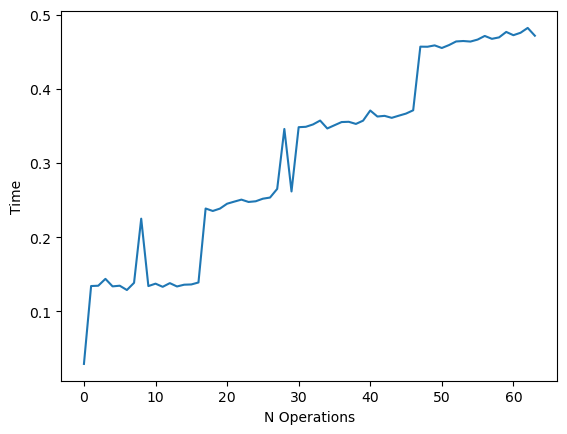

In [7]:
def inc(x):
    sleep(.1)
    return x + 1


def add(nums):
    # sleep(1)
    return sum(nums)
    
operations = np.arange(64)
times = []
for j in operations:
    nums = []
    start = time()
    A = client.map(inc, np.random.rand(j))
    total = client.submit(add, A)
    total.result()
    end = time()
    times.append(end - start)
plt.plot(operations, times)
plt.xlabel("N Operations")
plt.ylabel("Time")
    